# 图像傅立叶变换

傅立叶变换可以将图像转换到频域.

在图像中, 高频一般出现在边缘部分(图像变化明显的地方), 低频出现在平滑颜色区域(图像变化不明显的地方).通过可视化FT的结果, 我们可以看到图像高频和低频区域的含量以及分布.

In [1]:
import utils

%matplotlib inline

In [2]:
stripes_image = utils.imread('images/stripes.jpg')
solid_image = utils.imread('images/pink_solid.jpg')

## 演示图像

作为演示的两张简单图像, 第一张是一个条纹图片, 第二张是固定的粉色图像.

这两张图片都非常有规律但是具备代表性. 第一张的高频区域较多, 因为颜色在水平方向一直以黑色和白色在切换. 第二张图片的颜色完全没有变化,可以认为频率为0.

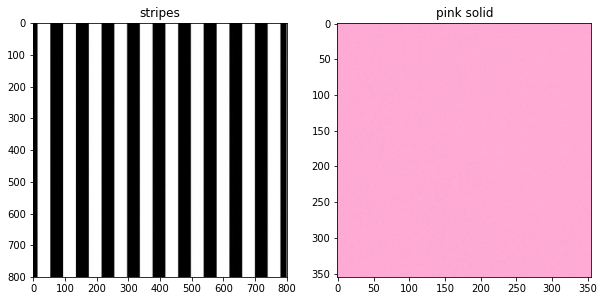

In [3]:
utils.show_images_in_single_row([stripes_image, solid_image], ['stripes', 'pink solid'])

在进行FT之前, 先把彩色图像转换为灰度图像. 因为FT研究的是颜色的变化, 不关心具体的颜色.

In [4]:
gray_stripes_image = utils.rgb2gray(stripes_image)
gray_solid_image = utils.rgb2gray(solid_image)

print('Gray shape =', gray_solid_image.shape)

Gray shape = (355, 355)


进行FT, 注意需要把\[ 0,255\]的像素值归一化到\[ 0,1\]范围内.

In [5]:
f_stripes_image = utils.ft_image(utils.normal_image(gray_stripes_image))
f_solid_image = utils.ft_image(utils.normal_image(gray_solid_image))

先来看条纹图片的FT结果.

FT结果图像中, 中心点表示频率为0. 水平表示原始图像沿着水平方向的频率强度, 垂直表示垂直方向的频率强度.

在条纹图像中, 低频部分是条纹本身, 高频部分是黑白条纹的交界处.而黑白变换都是水平的, 并且频率是一致的. 因此FT的结果有一条明显的水平白线.

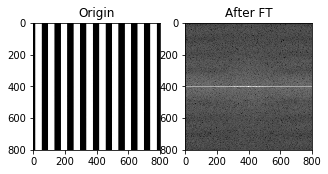

In [7]:
utils.show_images_in_single_row([stripes_image, f_stripes_image], ['Origin', 'After FT'], [None, 'gray'], (5, 2.5))

固定颜色的图像的FT结果就比较显然了, 中心有一个明显的白点, 表示原始图像大部分都是低频部分.

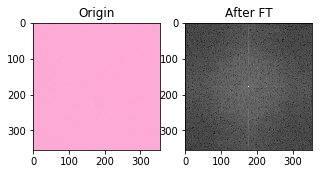

In [8]:
utils.show_images_in_single_row([solid_image, f_solid_image], ['Origin', 'After FT'], [None, 'gray'], (5, 2.5))

再来看一张图片, 这张图片的颜色变化是斜的.

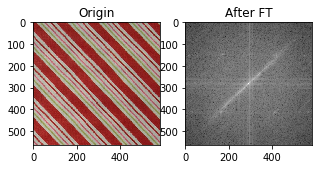

In [13]:
diag_stripes_image = utils.imread('images/diag_stripes.png')
gray_diag_stripes_image = utils.rgb2gray(diag_stripes_image)
f_diag_stripes_image = utils.ft_image(gray_diag_stripes_image)

utils.show_images_in_single_row([diag_stripes_image, f_diag_stripes_image], ['Origin', 'After FT'], [None, 'gray'], (5, 2.5))

颜色的变化方向主要是从左下到右上的. 在FT的图像中, 这个方向就有一条明显的白线.

## 真实图像

来看一张真实世界的图像.

这是一张包含了许多小鸟的图像.

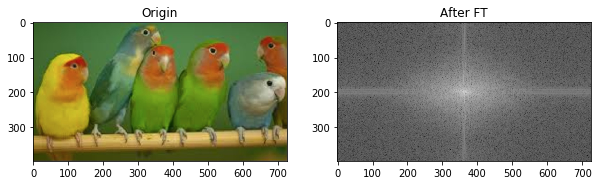

In [9]:
birds_image = utils.imread('images/birds.jpg')
gray_birds_image = utils.rgb2gray(birds_image)
f_birds_image = utils.ft_image(gray_birds_image)

utils.show_images_in_single_row([birds_image, f_birds_image], ['Origin', 'After FT'], [None, 'gray'])

FT的结果很好分析:

- 中心有一个明显的亮点, 说明原始图像有很多低频部分. 因为鸟儿的毛色都是比较固定的.
- 水平方向有明显的白线. 这是原始图像中水平方向的高频部分, 就是鸟儿的轮廓. 即它表示每只鸟儿的边缘部分产生的颜色变化.
- 垂直方向也有白线. 这是垂直方向的高频部分, 它表示鸟儿头部轮廓和树枝产生的颜色变化.
